<a href="https://colab.research.google.com/github/diascarolina/predicting-cancer-rates/blob/main/notebooks/Mortalidade_por_C%C3%A2ncer_de_Pulm%C3%A3o_nos_Condado_dos_Estados_Unidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mortalidade por Câncer de Pulmão nos Condado dos Estados Unidos

# Bibliotecas Utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from google.colab import files

In [2]:
# conferir a versão do Python utilizada
import sys
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [3]:
pd.__version__

'1.3.5'

# Carregamento dos Dados

In [4]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/diascarolina/predicting-cancer-rates/main/data/cancer_reg.csv',
                 encoding='latin-1')

In [5]:
df_raw.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# Processamento e Tratamento dos Dados

In [6]:
df = df_raw.copy()

In [7]:
df.shape

(3047, 34)

## Tratando Dados Nulos

In [8]:
for coluna in df.columns:
    if sum(df[coluna].isnull()):
        print(f'Nome da Variável: {coluna}, \tQuantidade de Nulos: {sum(df[coluna].isnull())}, \
        \tPorcentagem de Nulos: {round(sum(df[coluna].isnull()) / len(df), 2)}')

Nome da Variável: PctSomeCol18_24, 	Quantidade de Nulos: 2285,         	Porcentagem de Nulos: 0.75
Nome da Variável: PctEmployed16_Over, 	Quantidade de Nulos: 152,         	Porcentagem de Nulos: 0.05
Nome da Variável: PctPrivateCoverageAlone, 	Quantidade de Nulos: 609,         	Porcentagem de Nulos: 0.2


In [9]:
df = df.drop('PctSomeCol18_24', axis=1)

In [10]:
df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].mean(), inplace=True)

In [11]:
df['PctPrivateCoverageAlone'].describe()

count    2438.000000
mean       48.453774
std        10.083006
min        15.700000
25%        41.000000
50%        48.700000
75%        55.600000
max        78.900000
Name: PctPrivateCoverageAlone, dtype: float64

In [12]:
df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].mean(), inplace=True)

In [13]:
df['PctPrivateCoverageAlone'].describe()

count    3047.000000
mean       48.453774
std         9.018885
min        15.700000
25%        43.100000
50%        48.453774
75%        53.800000
max        78.900000
Name: PctPrivateCoverageAlone, dtype: float64

In [14]:
print(f'Quantidade de dados nulos no conjunto de dados: {df.isna().sum().sum()}')

Quantidade de dados nulos no conjunto de dados: 0


In [15]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


## Conferindo os Tipos dos Dados

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [17]:
df[['medIncome', 'binnedInc']]

,medIncome,binnedInc
0,61898,"(61494.5, 125635]"
1,48127,"(48021.6, 51046.4]"
2,49348,"(48021.6, 51046.4]"
3,44243,"(42724.4, 45201]"
4,49955,"(48021.6, 51046.4]"
...,...,...
3042,46961,"(45201, 48021.6]"
3043,48609,"(48021.6, 51046.4]"
3044,51144,"(51046.4, 54545.6]"
3045,50745,"(48021.6, 51046.4]"


In [18]:
df.drop('binnedInc', axis=1, inplace=True)

In [19]:
df[['MedianAge', 'MedianAgeMale', 'MedianAgeFemale']]

,MedianAge,MedianAgeMale,MedianAgeFemale
0,39.3,36.9,41.7
1,33.0,32.2,33.7
2,45.0,44.0,45.8
3,42.8,42.2,43.4
4,48.3,47.8,48.9
...,...,...,...
3042,44.2,41.1,48.8
3043,30.4,29.3,31.4
3044,30.9,30.5,31.2
3045,39.0,36.9,40.5


In [20]:
df.drop(['MedianAgeMale', 'MedianAgeFemale'], axis=1, inplace=True)

In [21]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'Geography', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24',
       'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

# Análise e Exploração dos Dados

In [22]:
# configurações para os gráficos
plt.style.use('seaborn-white')

rcParams['figure.figsize'] = 20, 10
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# cores para os gráficos
BLUE1 = '#0E4E9C'

In [23]:
df.head(3)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,Geography,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,"Kitsap County, Washington",...,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,"Kittitas County, Washington",...,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,"Klickitat County, Washington",...,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488


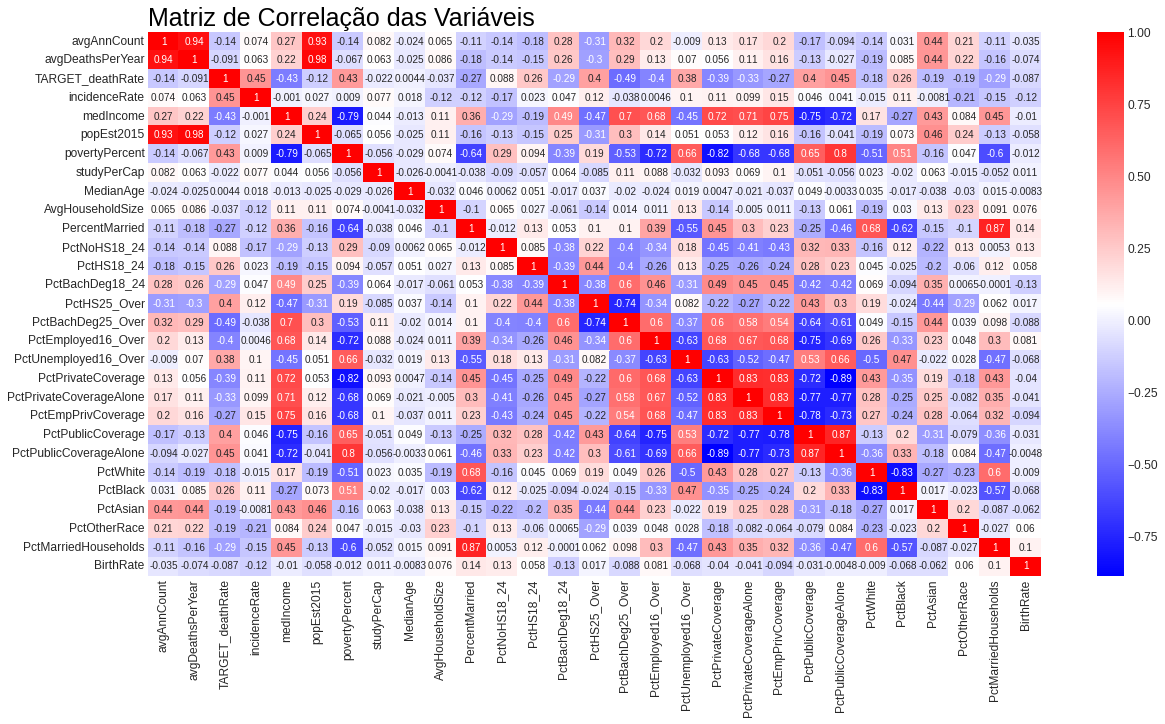

In [24]:
matriz_correlacao = df.corr()
sns.heatmap(matriz_correlacao,
            annot=True,
            cmap='bwr')
plt.title('Matriz de Correlação das Variáveis', loc = 'left', fontsize = 25)
plt.show()

In [25]:
matriz_correlacao

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,AvgHouseholdSize,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,0.064788,...,0.166674,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,0.086161,...,0.112221,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.036905,...,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.118400,...,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,0.112065,...,0.706956,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,0.109940,...,0.121365,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,0.074308,...,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.004071,...,0.068599,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,-0.031944,...,-0.021466,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
AvgHouseholdSize,0.064788,0.086161,-0.036905,-0.118400,0.112065,0.109940,0.074308,-0.004071,-0.031944,1.000000,...,-0.005006,0.011111,-0.134812,0.061115,-0.188446,0.030278,0.131535,0.229440,0.091450,0.075918


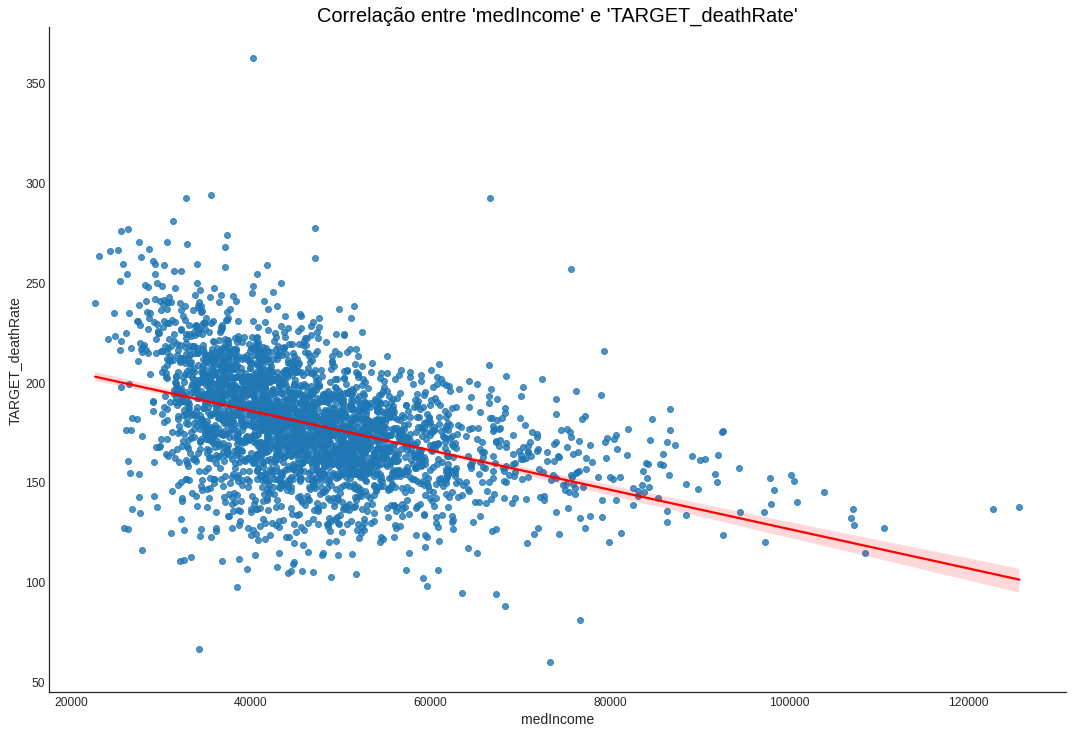

In [26]:
sns.lmplot(x='medIncome',
           y='TARGET_deathRate',
           data=df,
           palette=[BLUE1],
           line_kws={'color': 'red'},
           height=10, aspect=1.5)
plt.title("Correlação entre 'medIncome' e 'TARGET_deathRate'", fontsize=20)
plt.show()

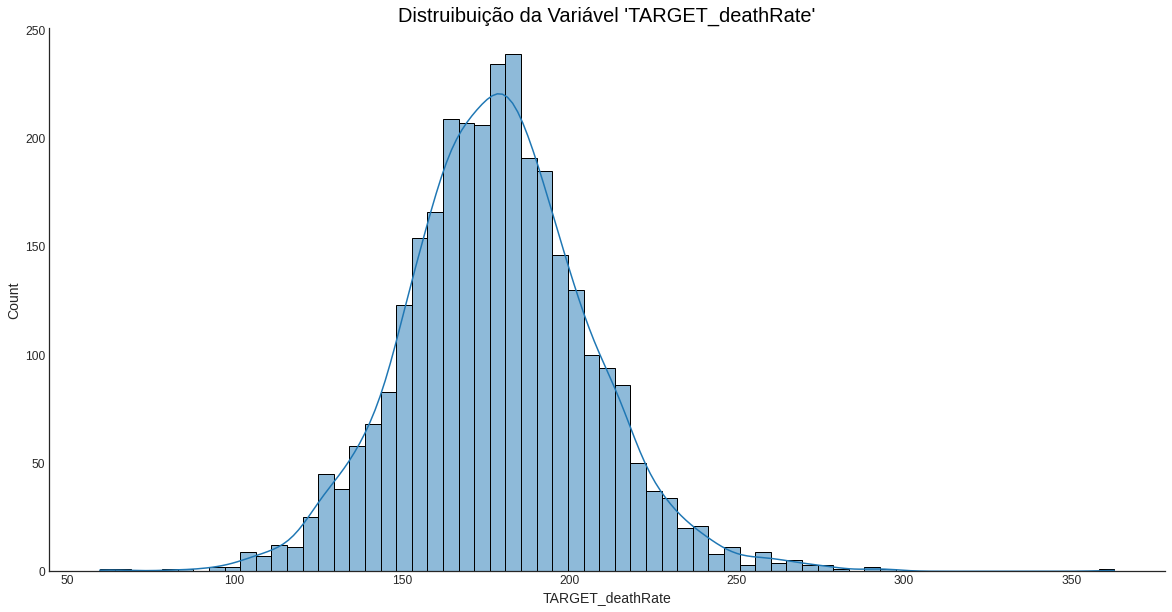

In [27]:
sns.histplot(df.TARGET_deathRate,
             kde=True)
sns.despine()
plt.title("Distruibuição da Variável 'TARGET_deathRate'", fontsize=20)
plt.show()

# Preparação dos Dados para os Modelos de Aprendizado de Máquina

In [28]:
df.Geography.describe()

count                          3047
unique                         3047
top       Kitsap County, Washington
freq                              1
Name: Geography, dtype: object

In [29]:
df = df.drop('Geography', axis=1)

In [30]:
df[df.duplicated()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,AvgHouseholdSize,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate


In [31]:
variaveis_muito_correlacionadas = ['avgAnnCount',
                                   'popEst2015',
                                   'povertyPercent',
                                   'PctPublicCoverage',
                                   'PctPublicCoverageAlone',
                                   'PctPrivateCoverage',
                                   'PctPrivateCoverageAlone',
                                   'PctEmpPrivCoverage',
                                   'PercentMarried']

df = df.drop(variaveis_muito_correlacionadas, axis=1)

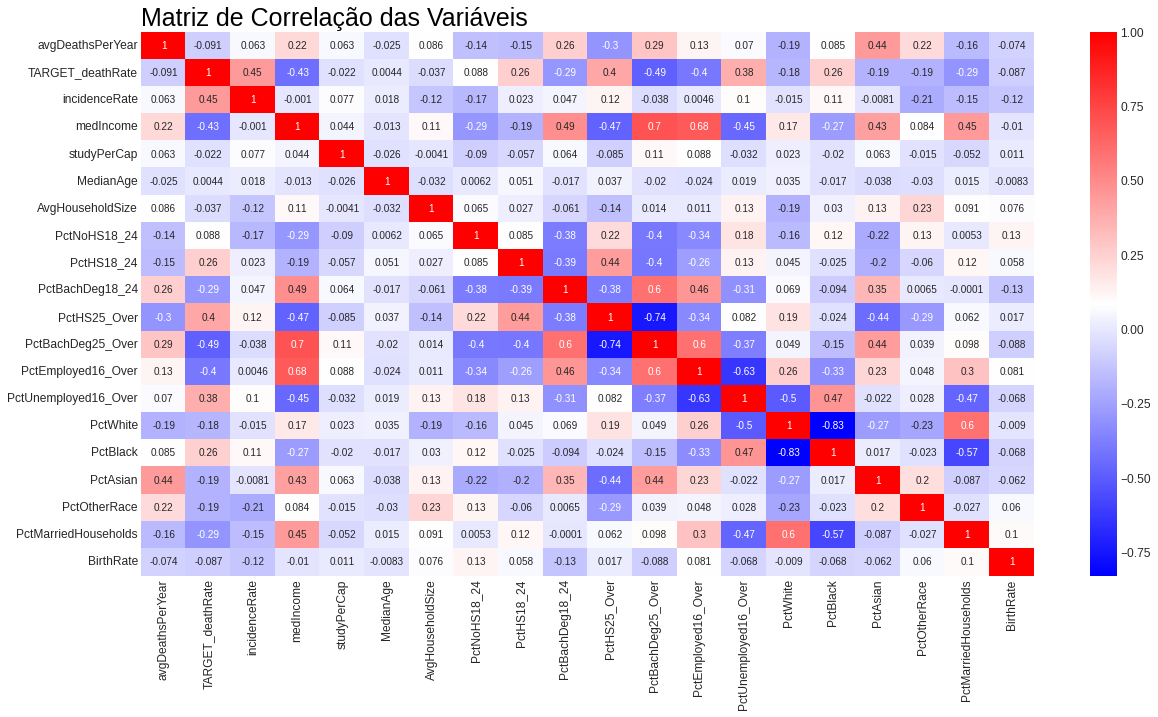

In [32]:
matriz_correlacao = df.corr()
sns.heatmap(matriz_correlacao,
            annot=True,
            cmap='bwr')
plt.title('Matriz de Correlação das Variáveis', loc = 'left', fontsize = 25)
plt.show()

In [33]:
colunas_numericas = ['TARGET_deathRate', 'avgDeathsPerYear', 'incidenceRate',
                     'medIncome', 'studyPerCap', 'MedianAge', 'AvgHouseholdSize',
                     'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
                     'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
                     'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
                     'PctMarriedHouseholds', 'BirthRate']

image = plt.figure(figsize=(20, 40), dpi = 500)
for indice, coluna in enumerate(colunas_numericas, start=1):
    plt.subplot(12, 4, indice)
    df.boxplot(coluna, grid=True)
# image.savefig('outliers.png', bbox_inches="tight")
# files.download('outliers.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
def remover_outliers(data, colunas):
    for coluna in colunas:
        Q1 = data[coluna].quantile(0.25)
        Q3 = data[coluna].quantile(0.75)
        IQR = Q3-Q1
        limite_inf = Q1-1.5*IQR
        limite_sup = Q3+1.5*IQR
        data = data.loc[(data[coluna] > limite_inf) & (data[coluna] < limite_sup)]
    return data

In [35]:
def remover_outliers(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3-Q1
    limite_inf = Q1-1.5*IQR
    limite_sup = Q3+1.5*IQR
    data = data.loc[(data[coluna] > limite_inf) & (data[coluna] < limite_sup)]
    return data

In [36]:
colunas_a_limpar = ['TARGET_deathRate',
                    'avgDeathsPerYear',
                    'MedianAge',
                    'medIncome',
                    'AvgHouseholdSize']

for coluna in colunas_a_limpar:
    df = remover_outliers(df, coluna)
df

,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,studyPerCap,MedianAge,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,70,161.3,411.600000,48127,23.111234,33.0,2.34,6.1,22.4,7.5,26.0,22.7,55.900000,7.8,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,50,174.7,349.700000,49348,47.560164,45.0,2.62,24.0,36.6,9.5,29.0,16.0,45.900000,7.0,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,202,194.8,430.400000,44243,342.637253,42.8,2.52,20.2,41.2,2.5,31.6,9.3,48.300000,12.1,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,26,144.4,350.100000,49955,0.000000,48.3,2.34,14.9,43.0,2.0,33.4,15.0,48.200000,4.8,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,152,176.0,505.400000,52313,180.259902,45.4,2.58,29.9,35.1,4.5,30.4,11.9,44.100000,12.9,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,12,215.9,453.549422,36471,0.000000,50.4,2.10,6.5,59.7,4.8,35.3,11.8,50.700000,5.3,94.371972,0.782706,0.409989,0.447261,52.149682,3.050109
3041,48,146.4,453.549422,49508,723.414516,32.2,2.35,2.9,17.7,9.8,27.7,21.9,68.600000,4.5,94.291726,1.145104,1.386542,1.014038,43.276779,3.977583
3042,15,149.6,453.549422,46961,0.000000,44.2,2.08,20.9,27.9,8.4,32.2,15.2,51.700000,4.3,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,43,150.1,453.549422,48609,377.175494,30.4,2.90,26.7,33.9,3.8,23.1,12.4,70.100000,4.6,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470


# Separando o dataset

In [37]:
X = df.drop('TARGET_deathRate', axis=1)
y = df['TARGET_deathRate']

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(1866, 19)
(1866,)
(233, 19)
(233,)
(234, 19)
(234,)


(None, None)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Aprendizado de Máquina

- Regressão Linear;
- Regressão Ridge;
- Regressão Lasso;
- Regressão ElasticNet;
- Regressão através de Redes Neurais.

## Modelo Dummy

In [39]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_val_preds_dummy = dummy_regr.predict(X_val)

In [40]:
r2_score_dummy = dummy_regr.score(X_val, y_val)
round(r2_score_dummy, 3)

-0.005

In [41]:
mae_reg_dummy = metrics.mean_absolute_error(y_val, y_val_preds_dummy)
round(mae_reg_dummy, 3)

19.384

In [42]:
mse_reg_dummy = metrics.mean_squared_error(y_val, y_val_preds_dummy)
round(mse_reg_dummy, 3)

611.655

In [43]:
rmse_reg_dummy = np.sqrt(metrics.mean_squared_error(y_val, y_val_preds_dummy))
round(rmse_reg_dummy, 3)

24.732

## Regressão Linear

In [44]:
from sklearn.linear_model import LinearRegression

reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
y_val_preds_reg_linear = reg_linear.predict(X_val)

In [45]:
r2_score_reg_linear = reg_linear.score(X_val, y_val)
round(r2_score_reg_linear, 3)

0.414

In [46]:
mae_reg_linear = metrics.mean_absolute_error(y_val, y_val_preds_reg_linear)
round(mae_reg_linear, 3)

14.725

In [47]:
mse_reg_linear = metrics.mean_squared_error(y_val, y_val_preds_reg_linear)
round(mse_reg_linear, 3)

356.683

In [48]:
rmse_reg_linear = np.sqrt(metrics.mean_squared_error(y_val, y_val_preds_reg_linear))
round(rmse_reg_linear, 3)

18.886

## Regressão Ridge

In [49]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_val_preds_ridge_reg = ridge_reg.predict(X_val)

In [50]:
r2_score_ridge_reg = ridge_reg.score(X_val, y_val)
round(r2_score_ridge_reg, 3)

0.414

In [51]:
mae_ridge_reg = metrics.mean_absolute_error(y_val, y_val_preds_ridge_reg)
round(mae_ridge_reg, 3)

14.725

In [52]:
mse_ridge_reg = metrics.mean_squared_error(y_val, y_val_preds_ridge_reg)
round(mse_ridge_reg, 3)

356.675

In [53]:
rmse_ridge_reg = np.sqrt(metrics.mean_squared_error(y_val, y_val_preds_ridge_reg))
round(rmse_ridge_reg, 3)

18.886

## Regressão Lasso

In [54]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
y_val_preds_lasso_reg = lasso_reg.predict(X_val)

In [55]:
r2_score_lasso_reg = lasso_reg.score(X_val, y_val)
round(r2_score_lasso_reg, 3)

0.408

In [56]:
mae_lasso_reg = metrics.mean_absolute_error(y_val, y_val_preds_lasso_reg)
round(mae_lasso_reg, 3)

14.776

In [57]:
mse_lasso_reg = metrics.mean_squared_error(y_val, y_val_preds_lasso_reg)
round(mse_lasso_reg, 3)

360.074

In [58]:
rmse_lasso_reg = np.sqrt(metrics.mean_squared_error(y_val, y_val_preds_lasso_reg))
round(rmse_lasso_reg, 3)

18.976

## Regressão ElasticNet

In [59]:
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(random_state=12)
elastic_net_reg.fit(X_train, y_train)
y_val_preds_elastic_net_reg = elastic_net_reg.predict(X_val)

In [60]:
r2_score_elastic_net_reg = elastic_net_reg.score(X_val, y_val)
round(r2_score_elastic_net_reg, 3)

0.394

In [61]:
mae_elastic_net_reg = metrics.mean_absolute_error(y_val, y_val_preds_elastic_net_reg)
round(mae_elastic_net_reg, 3)

14.925

In [62]:
mse_elastic_net_reg = metrics.mean_squared_error(y_val, y_val_preds_elastic_net_reg)
round(mse_elastic_net_reg, 3)

368.867

In [63]:
rmse_elastic_net_reg = np.sqrt(metrics.mean_squared_error(y_val, y_val_preds_elastic_net_reg))
round(rmse_elastic_net_reg, 3)

19.206

# Aplicando o Modelo Escolhido (Lasso) no Conjunto de Teste

In [64]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
y_test_preds_lasso_reg = lasso_reg.predict(X_test)

In [65]:
r2_score_lasso_reg = lasso_reg.score(X_test, y_test)
round(r2_score_lasso_reg, 3)

0.385

In [66]:
mae_lasso_reg = metrics.mean_absolute_error(y_test, y_test_preds_lasso_reg)
round(mae_lasso_reg, 3)

14.918

In [67]:
mse_lasso_reg = metrics.mean_squared_error(y_test, y_test_preds_lasso_reg)
round(mse_lasso_reg, 3)

378.792

In [68]:
rmse_lasso_reg = np.sqrt(metrics.mean_squared_error(y_test, y_test_preds_lasso_reg))
round(rmse_lasso_reg, 3)

19.463

# Pipeline Completa

In [69]:
def load_data(data_url):
    return pd.read_csv(data_url, encoding='latin-1')


def remover_outliers(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3-Q1
    limite_inf = Q1-1.5*IQR
    limite_sup = Q3+1.5*IQR
    data = data.loc[(data[coluna] > limite_inf) & (data[coluna] < limite_sup)]
    return data


def clean_data(df):
    df = df_raw.copy()
    df.drop('PctSomeCol18_24', axis=1, inplace=True)
    df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].mean(), inplace=True)
    df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].mean(), inplace=True)
    df.drop('binnedInc', axis=1, inplace=True)
    df.drop(['MedianAgeMale', 'MedianAgeFemale'], axis=1, inplace=True)
    df.drop('Geography', axis=1, inplace=True)
    variaveis_muito_correlacionadas = ['avgAnnCount', 'popEst2015', 'povertyPercent',
                                       'PctPublicCoverage', 'PctPublicCoverageAlone',
                                       'PctPrivateCoverage', 'PctPrivateCoverageAlone',
                                       'PctEmpPrivCoverage', 'PercentMarried']
    df.drop(variaveis_muito_correlacionadas, axis=1, inplace=True)
    colunas_a_limpar = ['TARGET_deathRate', 'avgDeathsPerYear', 'MedianAge',
                        'medIncome', 'AvgHouseholdSize']

    for coluna in colunas_a_limpar:
        df = remover_outliers(df, coluna)
    
    return df


def split_scale_data(df):
    X = df.drop('TARGET_deathRate', axis=1)
    y = df['TARGET_deathRate']

    X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return X_train, X_val, X_test, y_train, y_val, y_test


def train_lasso_model(X_train, y_train, X_test):
    lasso_reg = Lasso(alpha=1.0)
    lasso_reg.fit(X_train, y_train)
    y_test_preds_lasso_reg = lasso_reg.predict(X_test)
    return y_test_preds_lasso_reg


def calculate_metrics(y_real, y_prediction):
    r2 = round(lasso_reg.score(X_test, y_test), 3)
    mae = round(metrics.mean_absolute_error(y_test, y_test_preds_lasso_reg), 3)
    mse = round(metrics.mean_squared_error(y_test, y_test_preds_lasso_reg), 3)
    rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_preds_lasso_reg)), 3)
    return r2, mae, mse, rmse

In [70]:
def pipeline(data_url):
    df_raw = load_data(data_url)
    df_clean = clean_data(df_raw)
    X_train, X_val, X_test, y_train, y_val, y_test = split_scale_data(df_clean)
    y_preds = train_lasso_model(X_train, y_train, X_test)
    r2, mae, mse, rmse = calculate_metrics(y_test, y_preds)
    print(f'Regressão Lasso\nR2 = {r2}\nMAE = {mae}\nMSE = {mse}\nRMSE = {rmse}')

In [71]:
data_url = 'https://raw.githubusercontent.com/diascarolina/predicting-cancer-rates/main/data/cancer_reg.csv'

pipeline(data_url)

Regressão Lasso
R2 = 0.385
MAE = 14.918
MSE = 378.792
RMSE = 19.463
